# Загрузка данных

In [59]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from sklearn.datasets import load_iris, load_boston, load_wine
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [60]:
from IPython.display import Image
#import graphviz 
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.datasets import load_iris, load_wine, load_boston
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_boston
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [61]:
wine = load_wine()

In [62]:
df_wine = pd.DataFrame(wine.data,columns=wine.feature_names)
df_wine['target'] = pd.Series(wine.target)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [63]:
wine_X = wine.data[:, :2]
wine_y = wine.target
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(
    wine_X, wine_y, test_size=0.3, random_state=1)
wine_X_train.shape, wine_X_test.shape

((124, 2), (54, 2))

In [64]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(wine_X, wine_y)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = wine_X[:, 0], wine_X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=wine_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

In [65]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(15,7)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

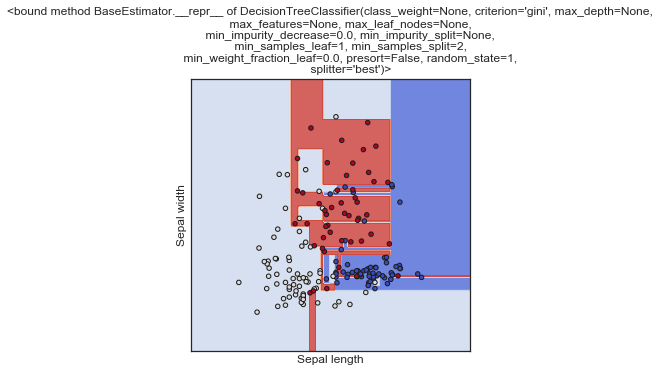

In [66]:
plot_cl(DecisionTreeClassifier(random_state=1))

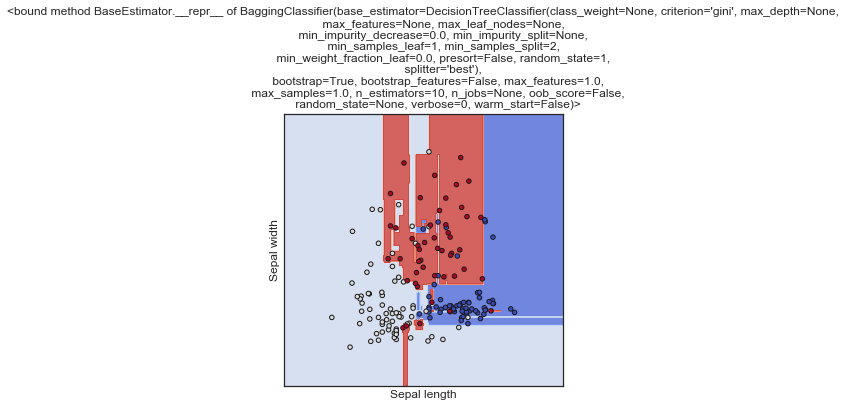

In [67]:
plot_cl(BaggingClassifier(DecisionTreeClassifier(random_state=1)))

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


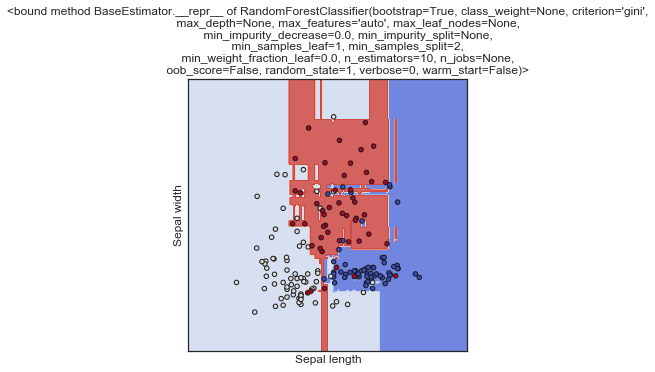

In [68]:
plot_cl(RandomForestClassifier(random_state=1))

# Бэггинг и случайный лес

In [69]:
wine_x_ds = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
wine_rf_cl = RandomForestClassifier(random_state=1)
wine_rf_cl.fit(wine_X_train, wine_y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [70]:
wine_y_test_predict = wine_rf_cl.predict(wine_X_test)

In [71]:
print(accuracy_score(wine_y_test, wine_y_test_predict))

0.8148148148148148


In [73]:
mean_absolute_error(wine_y_test, wine_y_test_predict)

0.25925925925925924

In [74]:
median_absolute_error(wine_y_test, wine_y_test_predict)

0.0

In [77]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [78]:
#CV_rfc = GridSearchCV(estimator=wine_rf_cl, param_grid=param_grid, cv= 5)
#CV_rfc.fit(wine_X_train, wine_y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [79]:
#CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [80]:
wine_x_ds = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
wine_rf_cl = RandomForestClassifier(random_state=1, criterion = 'gini', max_depth = 4, max_features = 'auto', n_estimators = 200)
wine_rf_cl.fit(wine_X_train, wine_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [81]:
wine_y_test_predict = wine_rf_cl.predict(wine_X_test)

In [82]:
print(accuracy_score(wine_y_test, wine_y_test_predict))

0.8703703703703703


In [83]:
mean_absolute_error(wine_y_test, wine_y_test_predict)

0.2037037037037037

In [84]:
median_absolute_error(wine_y_test, wine_y_test_predict)

0.0

# Бустинг и AdaBoost

In [88]:
wine_gb_cl = GradientBoostingClassifier(random_state=1)
wine_gb_cl.fit(wine_X_train, wine_y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [89]:
wine_y_test_predict = wine_gb_cl.predict(wine_X_test)

In [90]:
print(accuracy_score(wine_y_test, wine_y_test_predict))

0.8148148148148148


In [91]:
mean_absolute_error(wine_y_test, wine_y_test_predict)

0.2777777777777778

In [92]:
median_absolute_error(wine_y_test, wine_y_test_predict)

0.0

In [93]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

In [95]:
#CV_rfc = GridSearchCV(wine_gb_cl, parameters, cv=10, n_jobs=-1)
#CV_rfc.fit(wine_X_train, wine_y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'loss': ['deviance'], 'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2], 'min_samples_split': array([0.1    , 0.13636, 0.17273, 0.20909, 0.24545, 0.28182, 0.31818,
       0.35455, 0.39091, 0.42727, 0.46364, 0.5    ]), 'min_samples_leaf': array([0.1    , 0.13636, 0.17273, 0.2090...['friedman_mse', 'mae'], 'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0], 'n_estimators': [10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
     

In [96]:
#CV_rfc.best_params_

{'criterion': 'mae',
 'learning_rate': 0.025,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.28181818181818186,
 'n_estimators': 10,
 'subsample': 0.85}

In [97]:
wine_gb_cl = GradientBoostingClassifier(random_state=1, criterion = 'mae', learning_rate = 0.025, loss = 'deviance', max_depth = 3, max_features = 'log2', min_samples_leaf = 0.1, min_samples_split = 0.28181818181818186, n_estimators = 10, subsample= 0.85)
wine_gb_cl.fit(wine_X_train, wine_y_train)

GradientBoostingClassifier(criterion='mae', init=None, learning_rate=0.025,
              loss='deviance', max_depth=3, max_features='log2',
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=0.1,
              min_samples_split=0.28181818181818186,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=0.85, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [98]:
wine_y_test_predict = wine_gb_cl.predict(wine_X_test)

In [99]:
print(accuracy_score(wine_y_test, wine_y_test_predict))

0.8148148148148148


In [100]:
mean_absolute_error(wine_y_test, wine_y_test_predict)

0.2777777777777778

In [101]:
median_absolute_error(wine_y_test, wine_y_test_predict)

0.0